In [1]:
import pandas as pd
import numpy as np


In [5]:
data = pd.read_csv('Dataset/02-14-2018.csv')

In [6]:
data.head()

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,0,14/02/2018 08:31:01,112641719,3,0,0,0,0,0,...,0,0.0,0.0,0,0,56320859.5,139.300036,56320958,56320761,Benign
1,0,0,14/02/2018 08:33:50,112641466,3,0,0,0,0,0,...,0,0.0,0.0,0,0,56320733.0,114.551299,56320814,56320652,Benign
2,0,0,14/02/2018 08:36:39,112638623,3,0,0,0,0,0,...,0,0.0,0.0,0,0,56319311.5,301.934596,56319525,56319098,Benign
3,22,6,14/02/2018 08:40:13,6453966,15,10,1239,2273,744,0,...,32,0.0,0.0,0,0,0.0,0.000000,0,0,Benign
4,22,6,14/02/2018 08:40:23,8804066,14,11,1143,2209,744,0,...,32,0.0,0.0,0,0,0.0,0.000000,0,0,Benign


In [7]:
data.shape

(1048575, 80)

In [8]:
data.columns

Index(['Dst Port', 'Protocol', 'Timestamp', 'Flow Duration', 'Tot Fwd Pkts',
       'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max',
       'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std',
       'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean',
       'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean',
       'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot',
       'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min',
       'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max',
       'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags',
       'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s',
       'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean',
       'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt',
       'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt',
       'CWE Flag Count', 'ECE Flag Cnt', 'Down/Up Ratio', 'Pkt Size Avg',
      

In [12]:
columns_to_drop = ['Pkt Len Var']

In [14]:
data.drop(columns=columns_to_drop , inplace=True)

In [15]:
data.columns

Index(['Dst Port', 'Protocol', 'Timestamp', 'Flow Duration', 'Tot Fwd Pkts',
       'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max',
       'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std',
       'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean',
       'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean',
       'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot',
       'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min',
       'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max',
       'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags',
       'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s',
       'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean',
       'Pkt Len Std', 'FIN Flag Cnt', 'SYN Flag Cnt', 'RST Flag Cnt',
       'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt', 'CWE Flag Count',
       'ECE Flag Cnt', 'Down/Up Ratio', 'Pkt Size Avg', 'Fwd Seg Size Avg',
 

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [17]:
df = data.drop(columns=["Timestamp"], errors="ignore")
df.replace("N/A", np.nan, inplace=True)
df.dropna(inplace=True)

In [19]:
label_encoder = LabelEncoder()
df["Label"] = label_encoder.fit_transform(df["Label"])

In [20]:
X = df.drop(columns=["Label"]).apply(pd.to_numeric)
y = df["Label"]

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
# Check for NaN values
print("Missing values per column:")
print(X_train.isna().sum())

# Check for infinite values
print("\nColumns containing infinite values:")
print(X_train.replace([np.inf, -np.inf], np.nan).isna().sum())

# Check for extremely large values
print("\nMax values per column:")
print(X_train.max())


Missing values per column:
Dst Port         0
Protocol         0
Flow Duration    0
Tot Fwd Pkts     0
Tot Bwd Pkts     0
                ..
Active Min       0
Idle Mean        0
Idle Std         0
Idle Max         0
Idle Min         0
Length: 77, dtype: int64

Columns containing infinite values:
Dst Port         0
Protocol         0
Flow Duration    0
Tot Fwd Pkts     0
Tot Bwd Pkts     0
                ..
Active Min       0
Idle Mean        0
Idle Std         0
Idle Max         0
Idle Min         0
Length: 77, dtype: int64

Max values per column:
Dst Port         6.553300e+04
Protocol         1.700000e+01
Flow Duration    1.200000e+08
Tot Fwd Pkts     5.115000e+03
Tot Bwd Pkts     9.198000e+03
                     ...     
Active Min       1.102401e+08
Idle Mean        3.394503e+11
Idle Std         2.432682e+11
Idle Max         9.797810e+11
Idle Min         1.260300e+10
Length: 77, dtype: float64


In [24]:
# Replace infinite values with NaN
X_train.replace([np.inf, -np.inf], np.nan, inplace=True)
X_test.replace([np.inf, -np.inf], np.nan, inplace=True)

# Fill NaN values with median (better than mean for skewed data)
X_train.fillna(X_train.median(), inplace=True)
X_test.fillna(X_test.median(), inplace=True)


In [25]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [26]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "SVM": SVC(probability=True),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss"),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB()
}

In [27]:
results = {"Model": [], "Accuracy": [], "F1-Score": [], "Precision": [], "Recall": [], "ROC AUC": []}
conf_matrices = {}


In [33]:
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    y_prob = model.predict_proba(X_test_scaled)[:, 1] if hasattr(model, "predict_proba") else None
    
    # Compute metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred , average='weighted')
    precision = precision_score(y_test, y_pred , average='weighted')
    recall = recall_score(y_test, y_pred,average='weighted')
    y_prob = model.predict_proba(X_test_scaled) if hasattr(model, "predict_proba") else None
    roc_auc = roc_auc_score(y_test, y_prob, multi_class="ovr") if y_prob is not None else np.nan



    # Store results
    results["Model"].append(name)
    results["Accuracy"].append(accuracy)
    results["F1-Score"].append(f1)
    results["Precision"].append(precision)
    results["Recall"].append(recall)
    results["ROC AUC"].append(roc_auc)

    # Store confusion matrix
    conf_matrices[name] = confusion_matrix(y_test, y_pred)


c:\Users\Pratham\Desktop\College\Final Year\PD\env\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:47:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [34]:
results_df = pd.DataFrame(results)

C:\Users\Pratham\AppData\Local\Temp\ipykernel_12312\267673786.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Accuracy", y="Model", data=results_df.sort_values(by="Accuracy", ascending=False), palette="coolwarm")


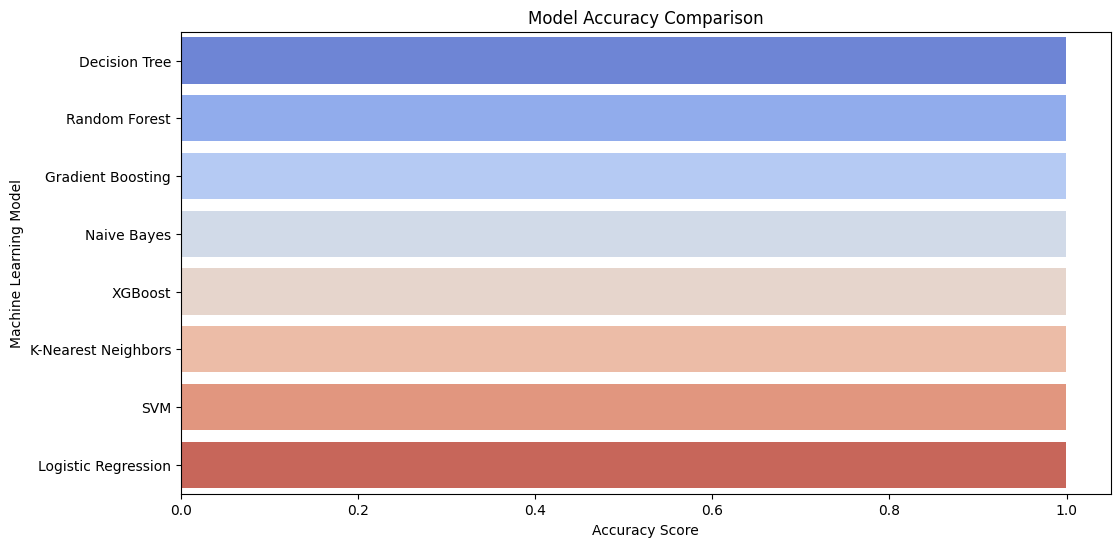

C:\Users\Pratham\AppData\Local\Temp\ipykernel_12312\267673786.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="F1-Score", y="Model", data=results_df.sort_values(by="F1-Score", ascending=False), palette="viridis")


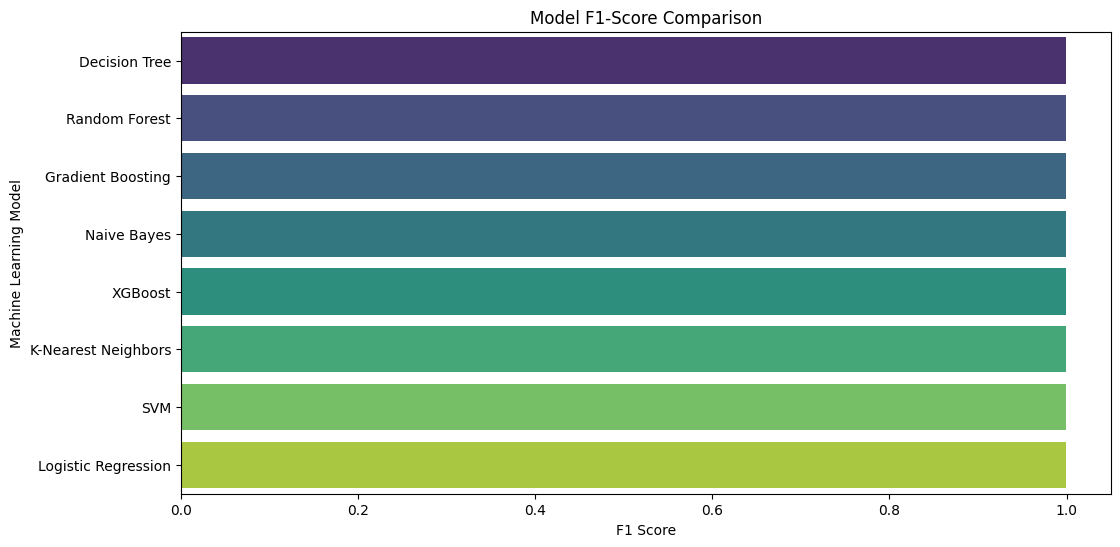

C:\Users\Pratham\AppData\Local\Temp\ipykernel_12312\267673786.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="ROC AUC", y="Model", data=results_df.sort_values(by="ROC AUC", ascending=False), palette="plasma")


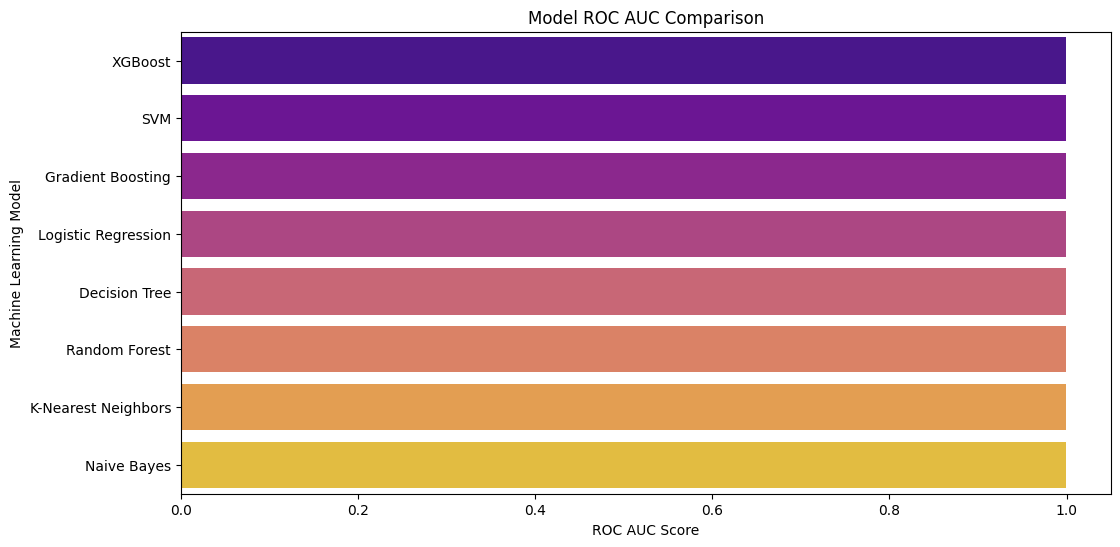

Confusion Matrix for Logistic Regression:
 [[132880     73      8]
 [     0  38710      0]
 [     0      7  37582]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    132961
           1       1.00      1.00      1.00     38710
           2       1.00      1.00      1.00     37589

    accuracy                           1.00    209260
   macro avg       1.00      1.00      1.00    209260
weighted avg       1.00      1.00      1.00    209260

------------------------------------------------------------
Confusion Matrix for Decision Tree:
 [[132961      0      0]
 [     0  38710      0]
 [     0      7  37582]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    132961
           1       1.00      1.00      1.00     38710
           2       1.00      1.00      1.00     37589

    accuracy                           1.00    209260
   macro a

In [35]:
# Plot accuracy comparison
plt.figure(figsize=(12, 6))
sns.barplot(x="Accuracy", y="Model", data=results_df.sort_values(by="Accuracy", ascending=False), palette="coolwarm")
plt.xlabel("Accuracy Score")
plt.ylabel("Machine Learning Model")
plt.title("Model Accuracy Comparison")
plt.show()

# Plot F1-score comparison
plt.figure(figsize=(12, 6))
sns.barplot(x="F1-Score", y="Model", data=results_df.sort_values(by="F1-Score", ascending=False), palette="viridis")
plt.xlabel("F1 Score")
plt.ylabel("Machine Learning Model")
plt.title("Model F1-Score Comparison")
plt.show()

# Plot ROC AUC comparison
plt.figure(figsize=(12, 6))
sns.barplot(x="ROC AUC", y="Model", data=results_df.sort_values(by="ROC AUC", ascending=False), palette="plasma")
plt.xlabel("ROC AUC Score")
plt.ylabel("Machine Learning Model")
plt.title("Model ROC AUC Comparison")
plt.show()

# Print classification reports
for name, matrix in conf_matrices.items():
    print(f"Confusion Matrix for {name}:\n", matrix)
    print("\nClassification Report:\n", classification_report(y_test, models[name].predict(X_test_scaled)))
    print("-" * 60)

# Show the final performance metrics table
print("\nFinal Performance Metrics:\n")
print(results_df)